## 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wikipedia-movie-plots.zip')

In [3]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
plot = df['Plot']

## TDM

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer(max_features=2000, stop_words='english')

In [7]:
tdm = cv.fit_transform(plot)

In [8]:
tdm.shape

(34886, 2000)

## One-Hot Encoding

In [9]:
import numpy as np

In [10]:
one_hot = np.eye(2000) # 항등행렬 대각행렬의 원소만 1이고 나머지 0 

In [11]:
one_hot.shape

(2000, 2000)

In [12]:
one_hot[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [13]:
one_hot[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [14]:
one_hot[2]

array([0., 0., 1., ..., 0., 0., 0.])

In [15]:
import re

In [16]:
words = cv.get_feature_names()

In [17]:
tokens = re.findall(cv.token_pattern, plot[0].lower())

In [18]:
tokens

['bartender',
 'is',
 'working',
 'at',
 'saloon',
 'serving',
 'drinks',
 'to',
 'customers',
 'after',
 'he',
 'fills',
 'stereotypically',
 'irish',
 'man',
 'bucket',
 'with',
 'beer',
 'carrie',
 'nation',
 'and',
 'her',
 'followers',
 'burst',
 'inside',
 'they',
 'assault',
 'the',
 'irish',
 'man',
 'pulling',
 'his',
 'hat',
 'over',
 'his',
 'eyes',
 'and',
 'then',
 'dumping',
 'the',
 'beer',
 'over',
 'his',
 'head',
 'the',
 'group',
 'then',
 'begin',
 'wrecking',
 'the',
 'bar',
 'smashing',
 'the',
 'fixtures',
 'mirrors',
 'and',
 'breaking',
 'the',
 'cash',
 'register',
 'the',
 'bartender',
 'then',
 'sprays',
 'seltzer',
 'water',
 'in',
 'nation',
 'face',
 'before',
 'group',
 'of',
 'policemen',
 'appear',
 'and',
 'order',
 'everybody',
 'to',
 'leave']

In [19]:
doc = np.zeros((1, 2000))

for token in tokens:
    try:
        i = words.index(token) # token의 word에서 위치(번호)
        doc += one_hot[i]
    except ValueError:
        pass

In [20]:
np.array_equal(doc, tdm[0, :].toarray())

True

## LSA를 이용한 단어 임베딩

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=10)

In [23]:
doc_emb = svd.fit_transform(tdm)
doc_emb.shape# 문장에 대하여 10개의 주제로 압축 

(34886, 10)

In [24]:
svd.components_.shape # 단어에 대하여 10개의 주제로 표현하기 위한 압축 

(10, 2000)

In [25]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0)

In [26]:
svd.components_.shape

(10, 2000)

In [27]:
word_emb = svd.components_.T

In [28]:
word_emb[:, :2]

array([[ 0.01788854, -0.00520137],
       [ 0.00817457, -0.00181465],
       [ 0.00441817, -0.00077487],
       ...,
       [ 0.067578  , -0.01469931],
       [ 0.0161578 ,  0.00010797],
       [ 0.00512192, -0.00108365]])

In [29]:
word_emb[words.index('money')]

array([ 0.08917884, -0.02653959, -0.01728499, -0.00373348, -0.02651401,
        0.00589985,  0.15162359, -0.04437892,  0.00959787, -0.03517365])

지정된 단어의 번호를 찾는다.

In [30]:
indices = []
target = ['family', 'gun', 'money', 'gang', 'war', 'police', 'friend', 'king', 'queen', 'prince', 'princess', 'father', 'mother', 'daughter', 'son']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

family 632
gun 778
money 1184
gang 719
war 1929
police 1340
friend 707
king 994
queen 1410
prince 1372
princess 1373
father 638
mother 1192
daughter 442
son 1668


## adjustText

plot에서 글자가 겹치지 않도록 조정해주는 adjustText를 설치한다.

!conda install -c conda-forge -y adjusttext 

!pip install adjusttext

## 단어 임베딩을 시각화

In [31]:
from matplotlib import pyplot

In [32]:
from adjustText import adjust_text

27

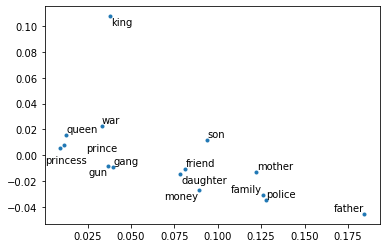

In [33]:
comp1 = 0
comp2 = 1

pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')
texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]
adjust_text(texts)   

## TSNE를 이용한 다차원 시각화

### 가까이 있는 애들은 차원을 낮췃을 때 가까이 있게 표현 아닌 경우 멀리 떨구는 기법 

In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE()

In [36]:
pos = tsne.fit_transform(word_emb)

36

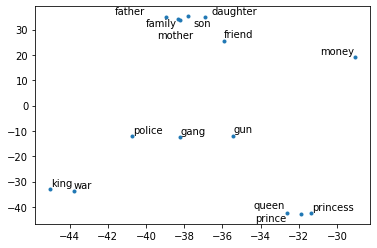

In [37]:
pyplot.plot(pos[indices, 0], pos[indices, 1], '.')
texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]
adjust_text(texts)

## 코사인 유사도

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
sim = cosine_similarity(word_emb)

In [40]:
sim.shape

(2000, 2000)

In [41]:
i = words.index('money')

In [42]:
pd.DataFrame({'word': words, 'similarity': sim[i]}).sort_values('similarity', ascending=False).head(10)

,word,similarity
1184,money,1.000000
1784,taxi,0.940991
167,beat,0.915889
1028,lawyer,0.906972
246,bus,0.906466
152,bag,0.868099
537,driver,0.865734
1341,policeman,0.862522
155,bank,0.858772
274,cash,0.844373


## Word2Vec

In [43]:
from gensim.models import Word2Vec

In [44]:
from gensim.utils import simple_preprocess

In [45]:
wv = Word2Vec(size=20, min_count=10, workers=4, sentences=[simple_preprocess(p) for p in plot]) 
# 10번 미만 나온 단어 제거 
# size = 단어 임베딩 차원 
# workers 동시에 사용할 코어 수 

In [47]:
wv.wv

In [46]:
wv.wv['money']

array([-3.142369  , -0.618643  , -4.9146185 , -0.7914652 , -0.6846278 ,
        2.9229386 , -4.4012146 , -0.2214014 ,  8.506479  , -1.1657261 ,
        4.577756  , -0.5199091 ,  2.7687745 , -0.5402835 ,  0.34528527,
        0.40489653,  0.11563286, -1.649375  , -4.3618627 ,  2.3196087 ],
      dtype=float32)

In [53]:
wv_words = sorted(set(words) & set(wv.wv.vocab)) # 단어 찾기 

In [54]:
len(wv_words)

1995

In [51]:
len(set(wv.wv.vocab))

39596

In [52]:
len(set(words))

2000

In [55]:
wvmat = wv.wv[wv_words] # 단어들의 값 임베딩 변환하기. 

In [56]:
wvmat.shape

(1995, 20)

### 시각화

In [60]:
w2v_tsne = TSNE()

In [61]:
w2v_pos = w2v_tsne.fit_transform(wvmat)

In [62]:
indices = [wv_words.index(w) for w in target]   

41

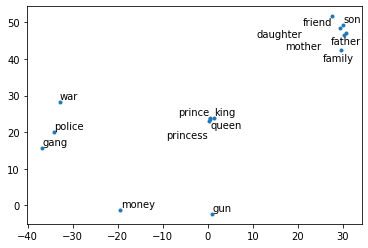

In [63]:
pyplot.plot(w2v_pos[indices, 0], w2v_pos[indices, 1], '.')
texts = [pyplot.text(w2v_pos[i, 0], w2v_pos[i, 1], w) for i, w in zip(indices, target)]
adjust_text(texts)

### 유사 단어

In [316]:
wv.wv.most_similar('money')

[('cash', 0.909034252166748),
 ('drugs', 0.8633865714073181),
 ('winnings', 0.842190146446228),
 ('debt', 0.8359923362731934),
 ('debts', 0.8320214748382568),
 ('payment', 0.8265412449836731),
 ('loan', 0.7961840033531189),
 ('million', 0.7882428169250488),
 ('reward', 0.7823245525360107),
 ('property', 0.7811795473098755)]